# Forbes Billionaires of 2021

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Billionaire.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [5]:
df.shape

(2755, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


# Data Cleaning

In [7]:
df['NetWorth'] = df['NetWorth'].str.lstrip('$').str.rstrip(' B')             # strip dollar and billion signs 
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177,United States,Amazon,1,57.0,Technology
1,Elon Musk,151,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,1,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,1,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,1,China,conglomerate,2674,58.0,Diversified


# Missing Data Exploration

In [8]:
df.isna().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [9]:
idx = df.index[df['Age'].isna()]                                        # 79 billionaires have their ages missing
df.iloc[idx]

,Name,NetWorth,Country,Source,Rank,Age,Industry
132,Hinduja brothers,14.9,United Kingdom,diversified,133,NaN,Diversified
255,Lam Wai-ying,9.1,Hong Kong,smartphone screens,256,NaN,Manufacturing
268,Chan Tan Ching-fen,8.8,Hong Kong,real estate,269,NaN,Real Estate
285,Anthony von Mandl,8.7,Canada,alcoholic beverages,274,NaN,Food & Beverage
294,Kuldip Singh & Gurbachan Singh Dhingra,8.4,India,paints,294,NaN,Manufacturing
...,...,...,...,...,...,...,...
2580,Lai Baosheng,1.1,China,consumer technology,2524,NaN,Technology
2639,Tseng Sing-ai,1.1,Taiwan,petrochemicals,2524,NaN,Manufacturing
2680,Carmen Daurella Aguilera,1,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage
2714,Michael McCain,1,Canada,packaged meats,2674,NaN,Food & Beverage


In [10]:
df1 = df[['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Industry']]
df1.head()

,Name,NetWorth,Country,Source,Rank,Industry
0,Jeff Bezos,177,United States,Amazon,1,Technology
1,Elon Musk,151,United States,"Tesla, SpaceX",2,Automotive
2,Bernard Arnault & family,150,France,LVMH,3,Fashion & Retail
3,Bill Gates,124,United States,Microsoft,4,Technology
4,Mark Zuckerberg,97,United States,Facebook,5,Technology


# Change Data Types

In [11]:
df1[['Name', 'Country', 'Source', 'Rank', 'Industry']] = df1[['Name', 'Country', 'Source', 'Rank', 'Industry']].astype('category')
df1['NetWorth'] = df1['NetWorth'].astype(float)
df1.head()

,Name,NetWorth,Country,Source,Rank,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,Technology


In [12]:
df1.shape

(2755, 6)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      2755 non-null   category
 1   NetWorth  2755 non-null   float64 
 2   Country   2755 non-null   category
 3   Source    2755 non-null   category
 4   Rank      2755 non-null   category
 5   Industry  2755 non-null   category
dtypes: category(5), float64(1)
memory usage: 182.0 KB


# Grouping and Aggregation

In [14]:
df1_gpd_agg = df1.groupby('Country').agg(
    min = pd.NamedAgg('NetWorth', np.min),
    mean = pd.NamedAgg('NetWorth', np.mean),
    max = pd.NamedAgg('NetWorth', np.max),
    total = pd.NamedAgg('NetWorth', np.sum),
)

df1_gpd_agg

,min,mean,max,total
Country,,,,
Algeria,4.8,4.800000,4.8,4.8
Argentina,1.3,3.060000,6.1,15.3
Australia,1.0,4.125000,23.6,181.5
Austria,1.1,5.225000,26.9,62.7
Belgium,1.1,4.200000,10.0,12.6
...,...,...,...,...
United Kingdom,1.0,3.819643,17.0,213.9
United States,1.0,6.075138,177.0,4398.4
Venezuela,3.2,3.200000,3.2,3.2


Aggregated NetWorth sorted by Countries in Descending Order 

In [15]:
df1_gpd_agg_sortdesc = df1_gpd_agg['total'].sort_values(ascending=False).head(20)                # top 20 countries
df1_gpd_agg_sortdesc

Country
United States     4398.4
China             2531.9
Germany            625.5
India              596.4
Russia             586.0
France             512.2
Hong Kong          448.2
Canada             231.1
Japan              225.4
United Kingdom     213.9
Brazil             211.7
Italy              204.5
Sweden             182.0
Australia          181.5
Singapore          156.9
Switzerland        145.5
Spain              137.0
Mexico             136.1
South Korea        121.4
Taiwan             115.6
Name: total, dtype: float64

In [16]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def trillion(x, pos):
    'The two args are the value and tick position'
    return '%1.1fTn ' % (x * 1e-3)

formatter_trill = FuncFormatter(trillion)

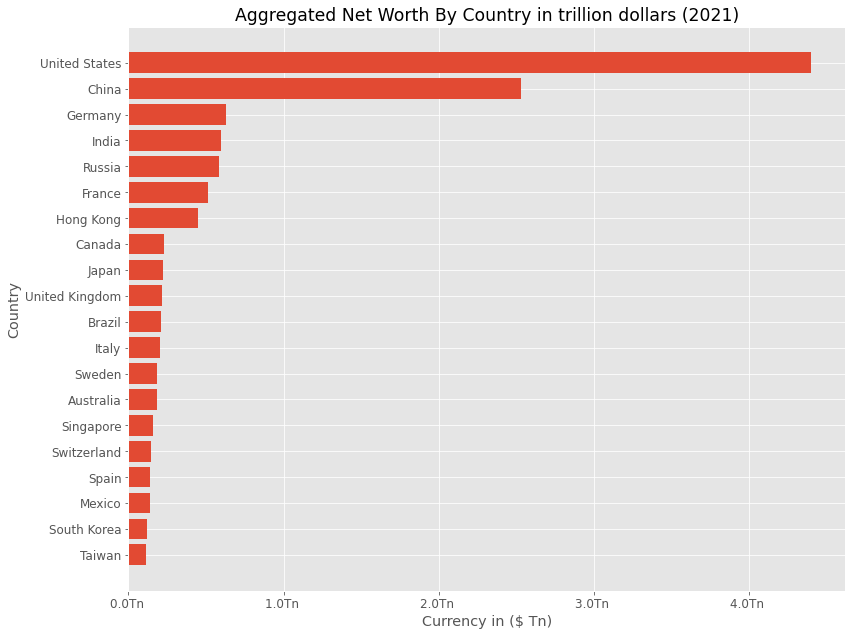

In [17]:
y, width = df1_gpd_agg_sortdesc.keys(), df1_gpd_agg_sortdesc.values

# Initialize the matplotlib figure
fig, ax = plt.subplots()

# plot bar chart
ax.barh(y=y, width=width)

# Add informative axis label
ax.set(xlabel='Currency in ($ Tn)', ylabel='Country', title='Aggregated Net Worth By Country in trillion dollars (2021)')

# labels read top-to-bottom
ax.invert_yaxis()  

# set axis formatter
ax.xaxis.set_major_formatter(formatter_trill)

Aggregated Net Worth sorted by Countries in Ascending Order 

In [18]:
df1_gpd_agg_sortasc = df1_gpd_agg['total'].sort_values(ascending=True).head(20)                # buttom 20 countries
df1_gpd_agg_sortasc

Country
Nepal                   1.4
Zimbabwe                1.5
Tanzania                1.6
St. Kitts and Nevis     1.6
Oman                    2.3
Guernsey                2.6
Hungary                 2.7
Slovakia                2.9
Qatar                   2.9
Macao                   3.1
Venezuela               3.2
Morocco                 3.2
Iceland                 3.2
Eswatini (Swaziland)    4.7
Monaco                  4.8
Algeria                 4.8
Liechtenstein           5.5
Portugal                7.2
Romania                 7.7
Georgia                 8.0
Name: total, dtype: float64

In [19]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def billion(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x * 1e-3)

formatter_bill = FuncFormatter(billion)

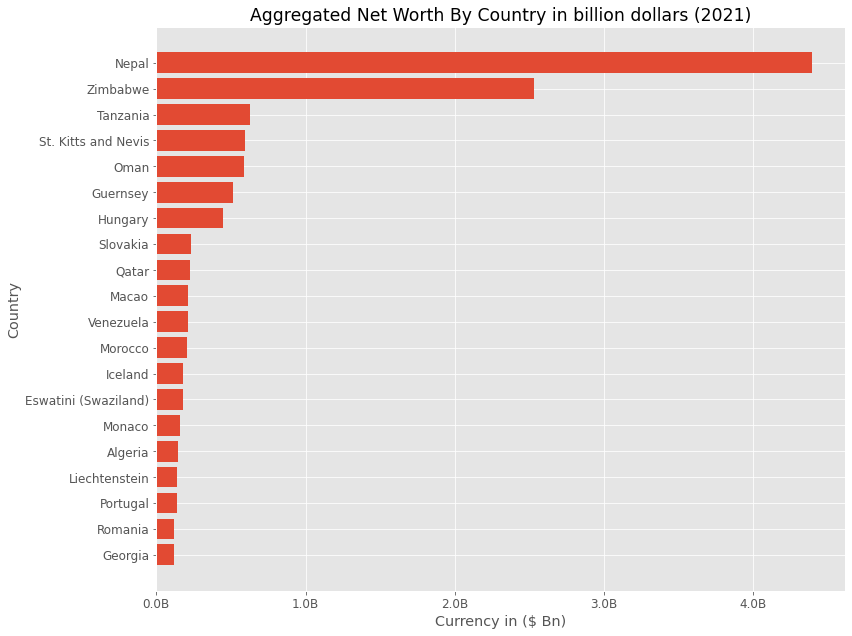

In [20]:
y1, width1 = df1_gpd_agg_sortasc.keys(), df1_gpd_agg_sortdesc.values

# Initialize the matplotlib figure
fig1, ax1 = plt.subplots()

# plot bar chart
ax1.barh(y=y1, width=width1)

# Add informative axis label
ax1.set(xlabel='Currency in ($ Bn)', ylabel='Country', title='Aggregated Net Worth By Country in billion dollars (2021)')

# labels read top-to-bottom
ax1.invert_yaxis()  

# set axis formatter
ax1.xaxis.set_major_formatter(formatter_bill)